##  Data Science and Business Analytics (Batch: MAY_2021).

#### Author : Priyadarshani Gangurde

#### Business Problem  : Exploratory Data Analysis - Terrorism Dataset.


1) As a security/defense analyst, try to find out the hot zone of terrorism.         
2)  What all security issues and insights you can derive by EDA?      

Solution:

In [32]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#### Data Preprocessing 

In [33]:
dataset = pd.read_csv(r"C:\Users\PRIYADARSHANI\Desktop\Internships\The Sparks Foundation\EDA\Case Study 2 Inter\globalterrorism.csv", encoding = 'latin1')
dataset.head()

C:\Users\PRIYADARSHANI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
dataset.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
dataset.rename(columns = {'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace=True)


In [5]:
data = dataset[['Year','Month','Extended','Day','Country','state','Region','city','latitude','longitude',
              'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']] 

In [6]:
data.isna().sum().sum()

234487

In [7]:
data = data.fillna(0, inplace = False)
data.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,0,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,0,MANO-D,Private Citizens & Property,Unknown,0
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",0,23rd of September Communist League,Government (Diplomatic),Unknown,0
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,0,Unknown,Journalists & Media,Unknown,0
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,0,Unknown,Government (Diplomatic),Explosives,0
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,0,Unknown,Government (Diplomatic),Incendiary,0


In [8]:
data.isna().sum().sum()

0

In [9]:
data.describe()

,Year,Month,Extended,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,0.045346,15.505644,22.909109,-4.471911e+02,2.266860,2.883296
std,13.259430,3.388303,0.208063,8.814045,18.699442,2.021946e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,9.518645,1.231572e+00,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.126646,4.314357e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.538560,6.835734e+01,2.000000,2.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


#### Visualization data

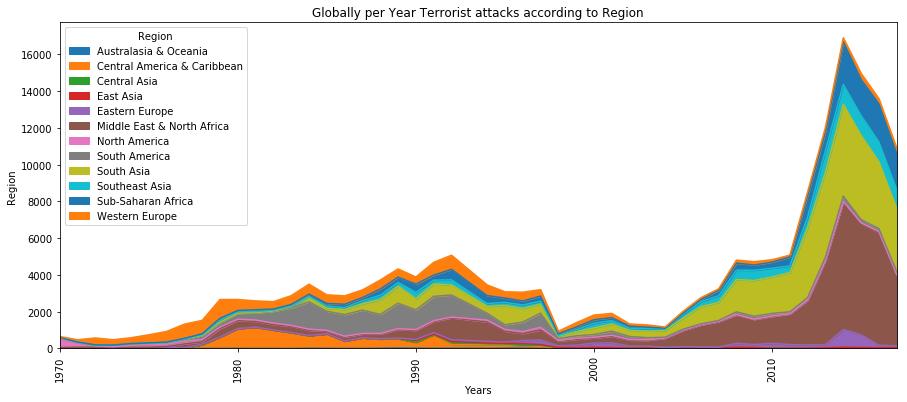

In [10]:
pd.crosstab(data.Year , data.Region).plot(kind = 'area', figsize = (15,6))
plt.xticks(rotation = 90)
plt.title("Globally per Year Terrorist attacks according to Region")
plt.xlabel("Years")
plt.ylabel("Region")
plt.show()

#### Analysis-1 
There are most terrorist attacks in Central Western Europe and Australasia & Oceania till the year 2000. After the year 2000, the terror attacks were increased in Central America & Caribbean and Australasia & Oceania and South Asia. 

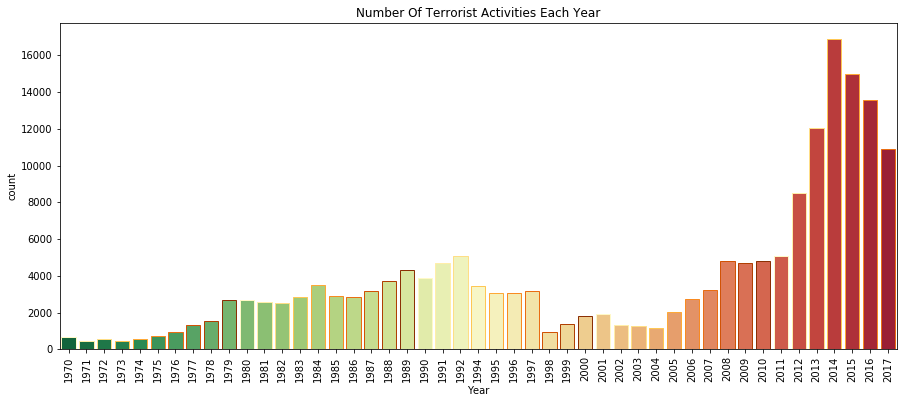

In [11]:
plt.subplots(figsize = (15,6))
sns.countplot('Year', data=data, palette = 'RdYlGn_r', edgecolor = sns.color_palette("YlOrBr", 10))
plt.xticks(rotation = 90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

#### Analysis-2 
There were less terror attacks till 2003. Terror attacks were started eventually increasing after the year 2004. The most terror attacks happend in the year of 2014. 

In [12]:
#History of the Worst Terror Attacks in Heatmap using Plotly

data['Wounded'] =data['Wounded'].fillna(0).astype(int)
data['Killed'] = data['Killed'].fillna(0).astype(int)
data['casualities'] = data['Killed'] + data['Wounded']

In [13]:
#Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

data1 = data.sort_values(by='casualities',ascending=False)[:40]

In [14]:
heat=data1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [15]:

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.as_matrix(), x=heat.columns, y=heat.index, colorscale=colorscale)
data2 = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

C:\Users\PRIYADARSHANI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



#### Analysis-3 
1) In 2001, the most casualities caused was 9574 in the United States of America, this is the extreme in a single year number in U.S terror attacks till 2017.                           
2) In 1998, the most casualities caused was 4224 casualities in Kenya stands on second position in a single year in terror attack till 2017.

In [16]:
data.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

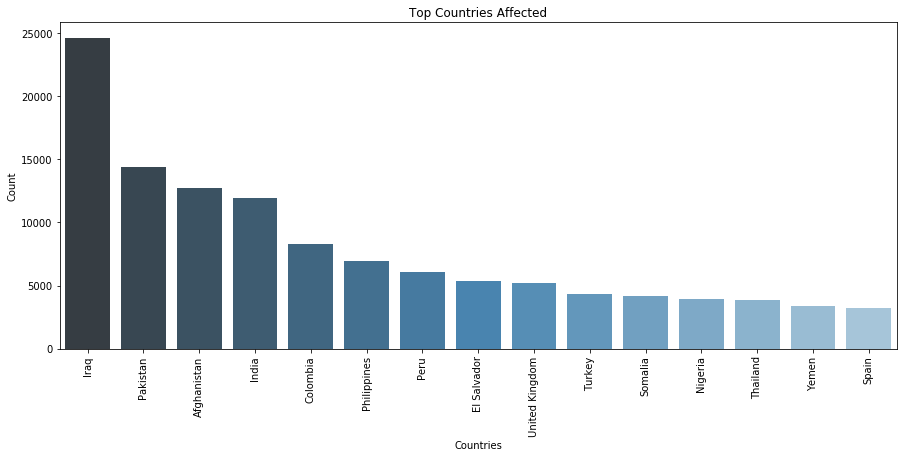

In [17]:
#Top Countries affected by Terror Attacks¶

plt.subplots(figsize=(15,6))

sns.barplot(data['Country'].value_counts()[:15].index, data['Country'].value_counts()[:15].values, palette='Blues_d')

plt.title('Top Countries Affected')

plt.xlabel('Countries')
plt.ylabel('Count')

plt.xticks(rotation= 90)
plt.show()

#### Analysis-4 
Iraq stands on first in most affected country by terror attacks while Pakistan stands on second. 

In [18]:
#Now to visualize the top four countries that have suffered the most using bubble charts in Plotly¶

terror_data =data[(data['Group'] != 'Unknown') & (data['casualities'] > 50)]
terror_data.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1200,1972,3,0,4,United Kingdom,Northern Ireland,Western Europe,Belfast,54.607712,-5.956210,Bombing/Explosion,2,130,"Janet Bereen, 21 and Anne Owens, 22, Catholics",0,Irish Republican Army (IRA),Business,Explosives,0,132
1314,1972,5,0,30,Israel,Central,Middle East & North Africa,Lod,32.004361,34.888229,Bombing/Explosion,26,72,Aircraft Terminal,0,Japanese Red Army (JRA),Airports & Aircraft,Firearms,0,98
1789,1973,3,0,8,United Kingdom,England,Western Europe,London,51.504387,-0.140041,Bombing/Explosion,1,238,Court Building,0,Irish Republican Army (IRA),Government (General),Explosives,0,239
1972,1973,8,0,5,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,5,55,TWA Lounge,0,Black September,Airports & Aircraft,Firearms,0,60
2138,1973,12,1,17,Italy,Lazio,Western Europe,Rome,41.890961,12.490069,Hostage Taking (Barricade Incident),30,50,Pan Am Lounge and Loading Pan Am 707,0,Black September,Airports & Aircraft,Firearms,0,80


In [19]:
terror_data = terror_data.sort_values(['Region', 'Country'])

In [20]:
#It is best to always check for null values and drop the features that are not needed. Atleast it can execute much faster¶

terror_data.isnull().sum()

Year           0
Month          0
Extended       0
Day            0
Country        0
state          0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
casualities    0
dtype: int64

In [21]:
terror_data = terror_data.drop(['latitude', 'longitude', 'Summary', 'Motive', 'Target'],axis=1)

In [22]:
terror_data = terror_data.dropna(subset=['city'])

In [23]:
terror_data.isnull().sum()

Year           0
Month          0
Extended       0
Day            0
Country        0
state          0
Region         0
city           0
AttackType     0
Killed         0
Wounded        0
Group          0
Target_type    0
Weapon_type    0
casualities    0
dtype: int64

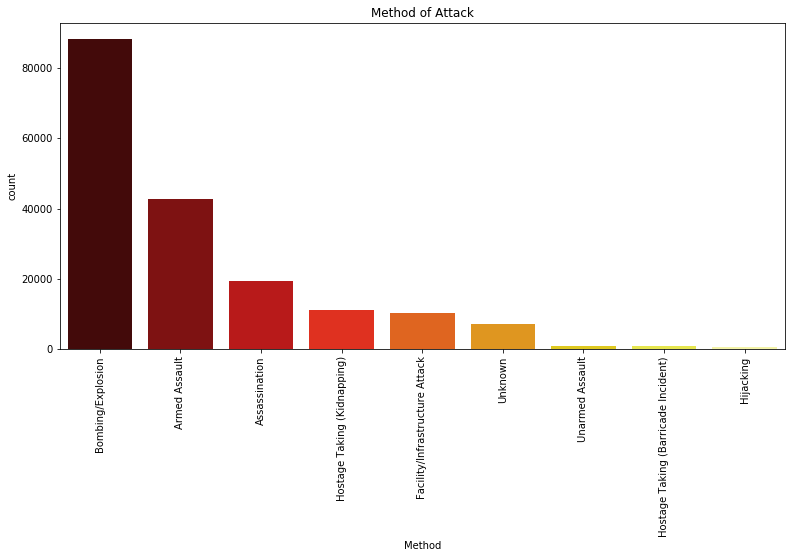

In [24]:
#Methods of attack

plt.figure(figsize = (13,6))

sns.countplot(data['AttackType'], data = data, order = data['AttackType'].value_counts().index,
              palette='hot')

plt.xticks(rotation = 90)
plt.xlabel('Method')

plt.title('Method of Attack')
plt.show()

#### Analysis-5 
The most used technique in terrorist attacks was Bombing or Explosion.

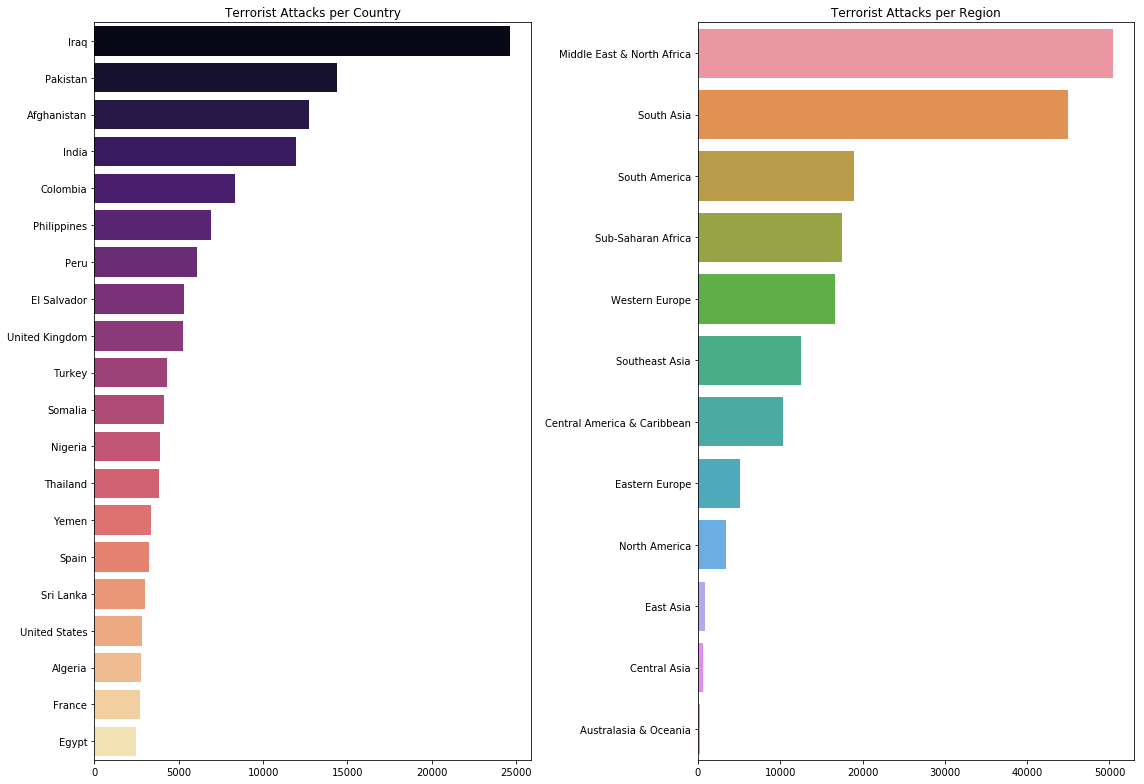

In [25]:
#Country and region

fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)

sns.barplot(x = data['Country'].value_counts()[:20].values, y = data['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');

axes[0].set_title('Terrorist Attacks per Country')

sns.barplot(x = data['Region'].value_counts().values, y = data['Region'].value_counts().index,
            ax=axes[1])

axes[1].set_title('Terrorist Attacks per Region')

fig.tight_layout()
plt.show()

#### Analysis-6 
The country that faced most terror attacks is Iraq. The most terror attacks caused in the Middle East & North Africa region.
The second most terror hunted country is Pakistan and the second most region is South Asia.

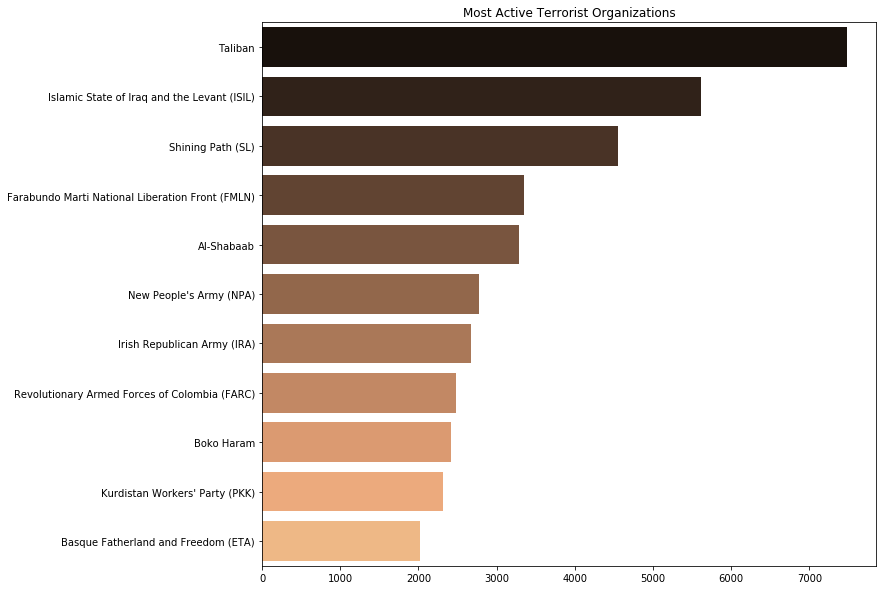

In [26]:
#Most active organizations

plt.subplots(figsize=(11,10))

sns.barplot(y = data['Group'].value_counts()[1:12].index, x = data['Group'].value_counts()[1:12].values,
           palette='copper')

plt.title('Most Active Terrorist Organizations')
plt.show()

#### Analysis-7 
Among terror organizations, Taliban has been the most active terror oraganization causing most attacks, second is "Islamic State of Iraq and the Levant (ISIL)" and third is "Shining Path (SL)".  

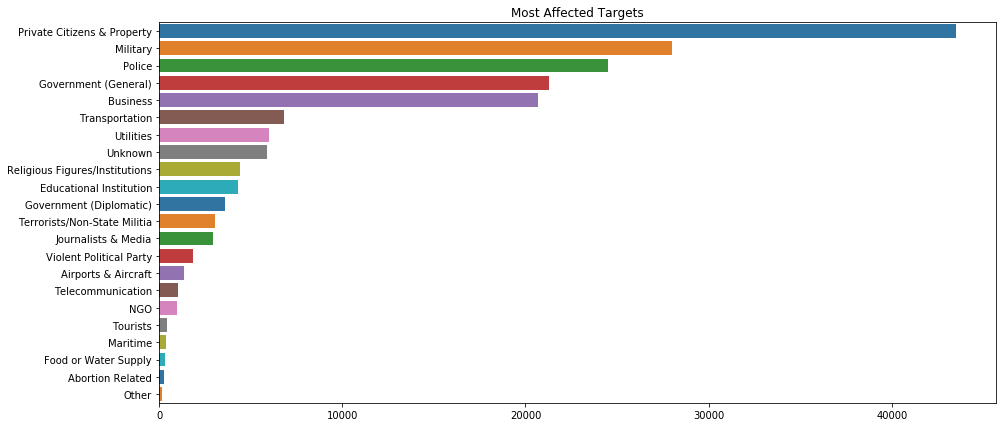

In [27]:
#Most affected targets

plt.subplots(figsize = (15,7))

sns.barplot(y = data['Target_type'].value_counts().index, x = data['Target_type'].value_counts().values,
           palette='tab10')

plt.title('Most Affected Targets')

plt.show()

#### Analysis-8 
Assets that are extremely affected by terror attacks are "Private Citizens & Property", second "Millitary" and third "Police"

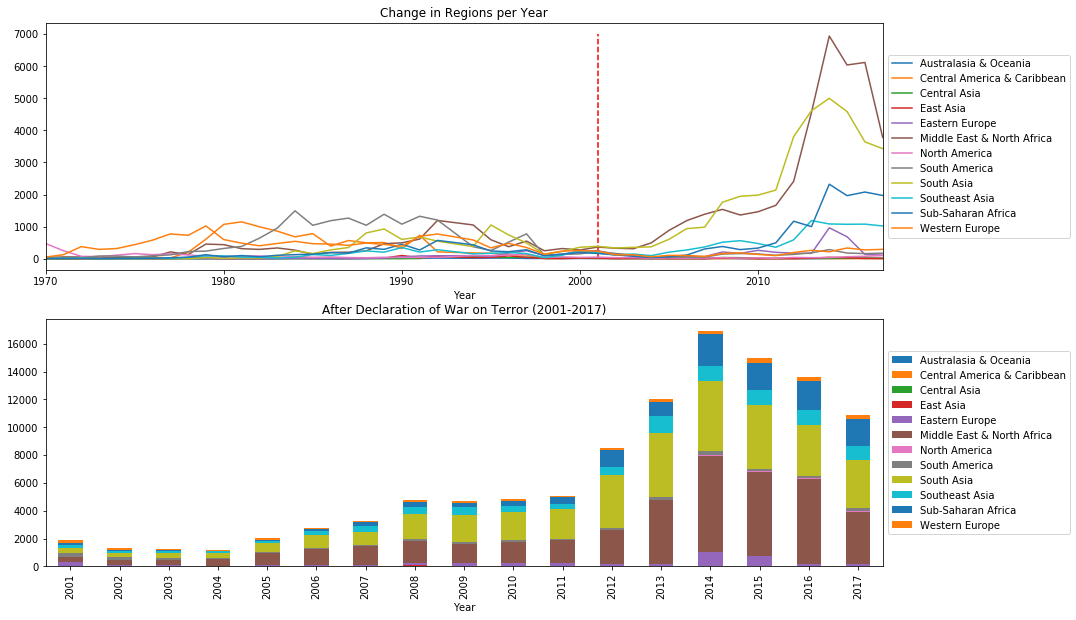

In [28]:
#Before and after the War on Terror

data_after = data[data['Year'] >= 2001]
fig , ax = plt.subplots(figsize = (15,10), nrows=2, ncols=1)

ax[0] = pd.crosstab(data.Year, data.Region).plot(ax = ax[0])

ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x = 2001, ymin = 0, ymax = 7000, colors = 'red', linestyles='--')

pd.crosstab(data_after.Year, data_after.Region).plot.bar(stacked = True, ax = ax[1])

ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc = 'center left',bbox_to_anchor = (1,0.5))

plt.show()

#### Analysis-9
After the 9/11 attacks in New York City, the US-led War on Terror was launched with the goal to distinguish terrorism primarily in the Middle East. Here, it is shown as a turning point for activity patterns in each region.


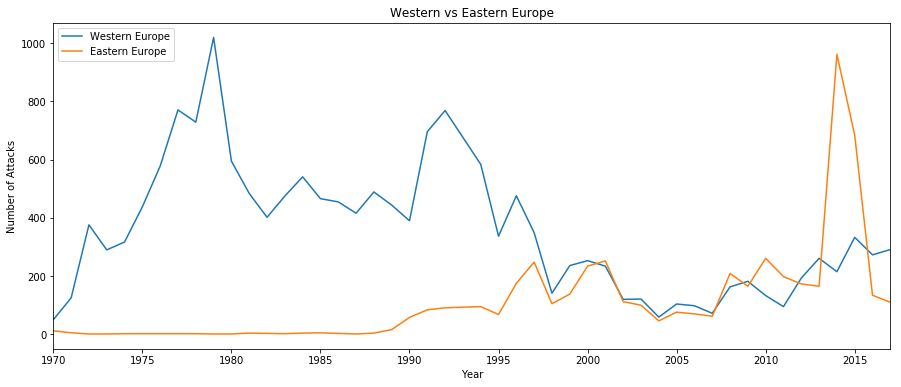

In [29]:
bfig,axes = plt.subplots(figsize=(15,6))

sns.lineplot(data[data['Region'] == 'Western Europe']['Year'].value_counts().index,
             data[data['Region'] == 'Western Europe']['Year'].value_counts().values)

sns.lineplot(data[data['Region'] == 'Eastern Europe']['Year'].value_counts().index,
             data[data['Region'] == 'Eastern Europe']['Year'].value_counts().values)

plt.xlabel('Year')

plt.xticks(np.arange(1970, 2017, 5))

plt.xlim(1970, 2017)

plt.ylabel('Number of Attacks')

plt.title('Western vs Eastern Europe')

axes.legend(labels=['Western Europe','Eastern Europe'])

plt.show()

#### Analysis-10 
1) From 1970 to year 2000, Western Europe was more affected by terror attacks.                                     
2) From 2000 to year 2015, Eastern Europe was more affected by terror attacks.                              
So Western Europe was more affected.

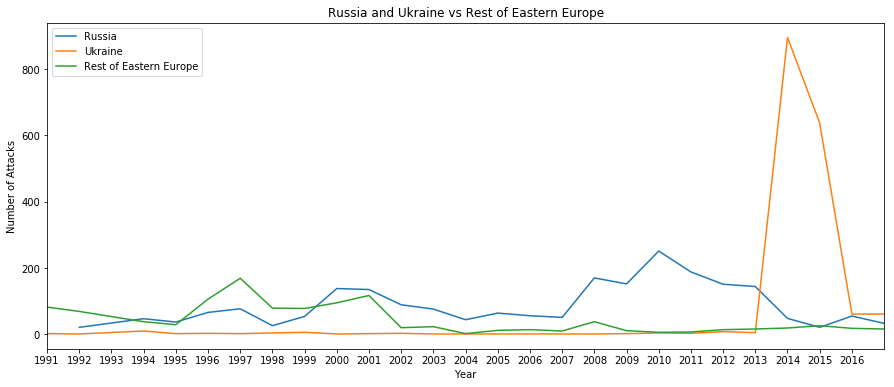

In [30]:
fig,ax = plt.subplots(figsize = (15,6))

russia = data[(data['Country'] == 'Russia') & (data['Year'].between(1991, 2017, inclusive = True))]['Year'].value_counts()

ukraine = data[(data['Country'] == 'Ukraine') & (data['Year'].between(1991, 2017, inclusive=True))]['Year'].value_counts()

rest_east = data[(data['Country'] != 'Russia') & (data['Country'] != 'Ukraine')
               & (data['Region'] == 'Eastern Europe')
               & (data['Year'].between(1991, 2017, inclusive = True))]['Year'].value_counts()

sns.lineplot(x = russia.index, y = russia.values)
sns.lineplot(x = ukraine.index, y = ukraine.values)
sns.lineplot(x = rest_east.index, y = rest_east.values)

plt.xticks(np.arange(1991, 2017, 1))

plt.xlim(1991, 2017)

plt.xlabel('Year')
plt.ylabel('Number of Attacks')

plt.title('Russia and Ukraine vs Rest of Eastern Europe')

ax.legend(labels = ['Russia','Ukraine','Rest of Eastern Europe'])

plt.show()

#### Analysis-11 
Till 2013 Russia was most affected than rest of the Europe, while in between 2013 to 2016 Ukrain faced more damage from terror attacks than rest of the Europe. 

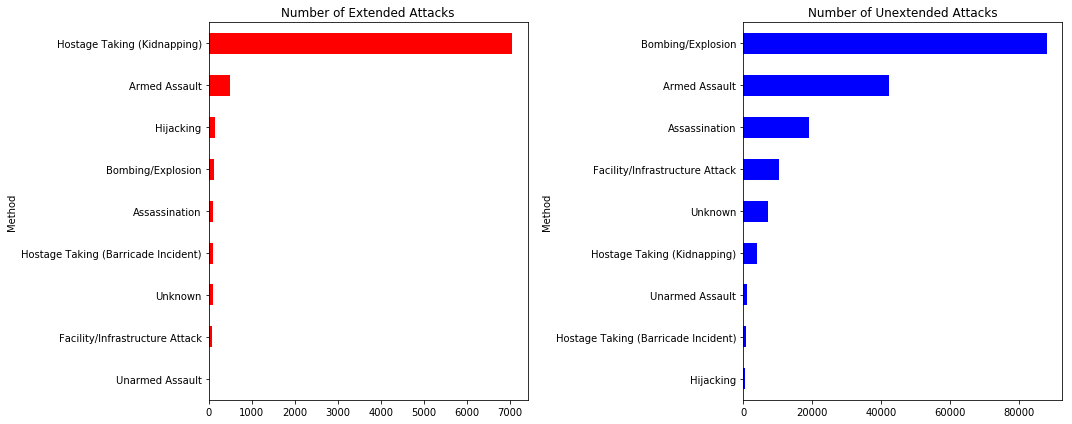

In [31]:
fig , ax = plt.subplots(figsize=(15, 6), nrows = 1, ncols = 2)

ax[0] = data[data['Extended'] == 1].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color = 'red', ax = ax[0])
ax[1] = data[data['Extended'] == 0].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color = 'blue', ax = ax[1])

ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')

ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')

plt.tight_layout()

plt.show()

#### Analysis-12 
1) If we chose to analyse the Attack Type in terms of Extended Attacks, we shall get more cases in Hostage Taking or Kidnapping.                            
2) If we chose to analyse the Attack Type in terms of Unextended Attacks, we shall get more cases in Bombing or Explosions.

#### Conclusion 

1) We saw that after US-led War on Terror the attacks balooned up dramatically.                           
2) The most affected countries are belong to Middle East and South Asia.                   
3) Most terror attacks was done by the organizations are Taliban, ISIL and SP.                                   
4) Most terror attacks was done using Bombing or Explosions, Kidnapping, and Armed Asaults.                          
5) Most affected categories among the society are Private Citizens, Property, Millitary, and Police.                         
6) Specifically in West, the Russia and Ukrain affected most then rest of of the Europe.                             
7) Western Europe was more affected than Eastern Europe.